In [84]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [85]:
df = pd.read_csv('HousingData.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [86]:
df['MEDV'] = df['MEDV'].apply(lambda x: 1 if x > 25 else 0) # 1 = mahal 0 = murah

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [88]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,0.245059
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,0.430548
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,0.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,0.000000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,0.000000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,0.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,1.000000


In [89]:
df.shape

(506, 14)

In [90]:
df.isna().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [91]:
df.dropna(inplace=True)

In [92]:
df.duplicated().sum()

np.int64(0)

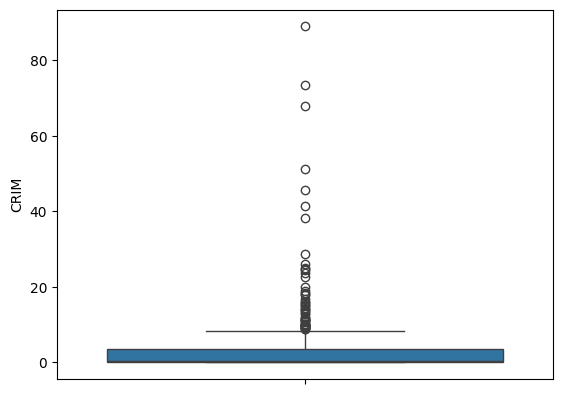

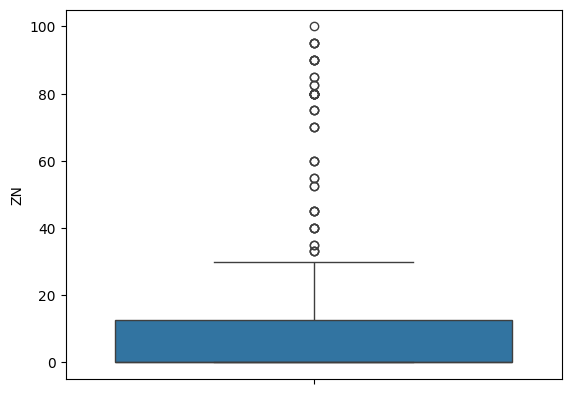

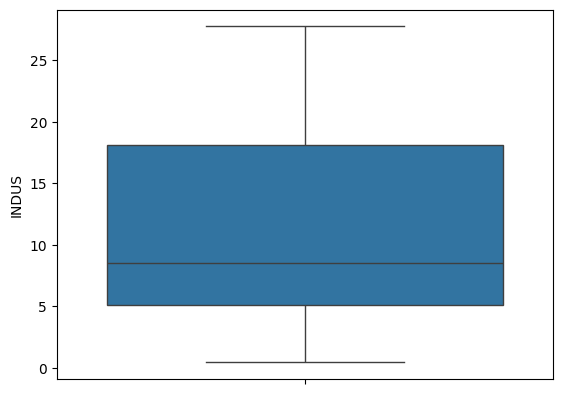

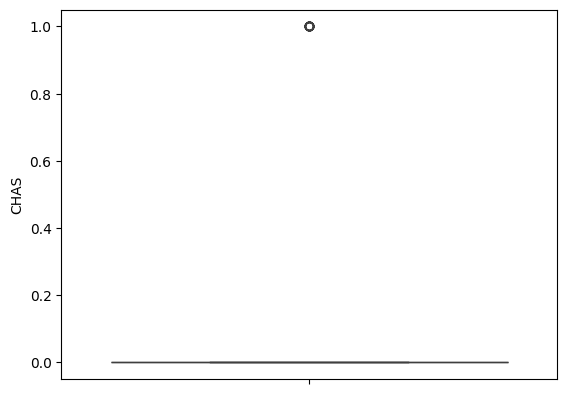

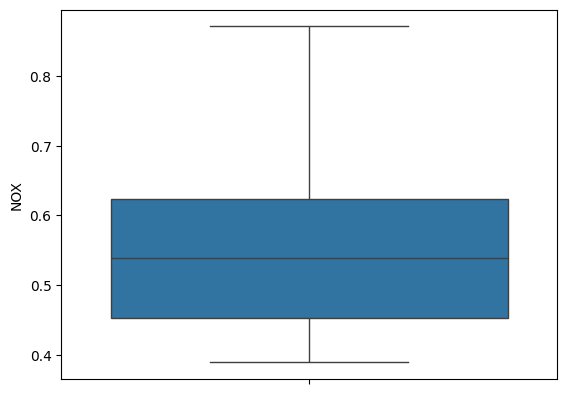

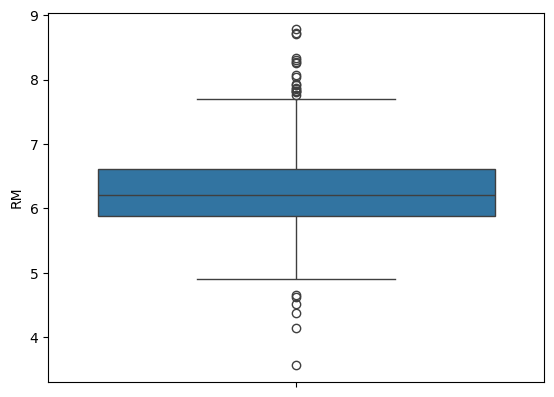

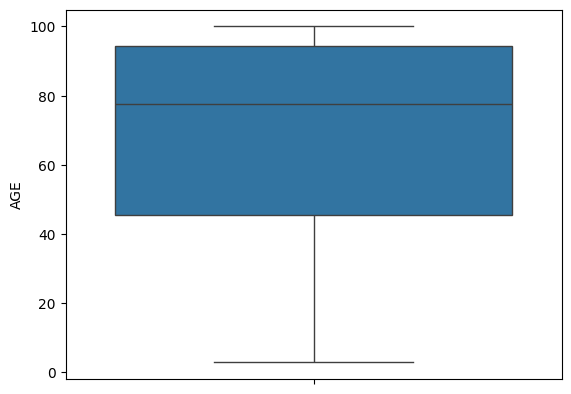

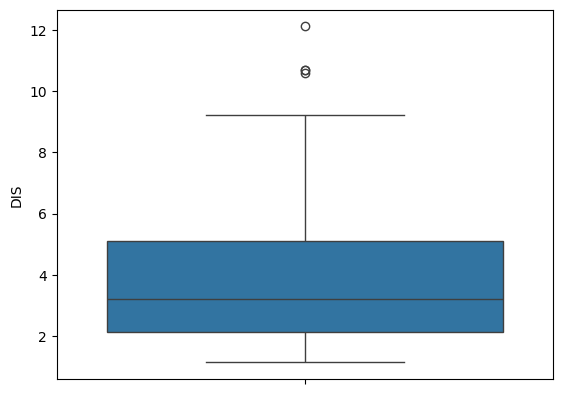

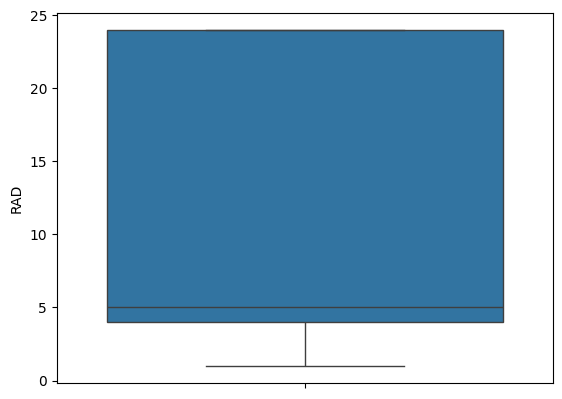

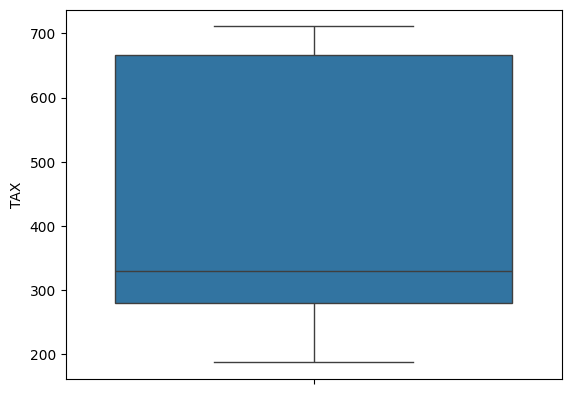

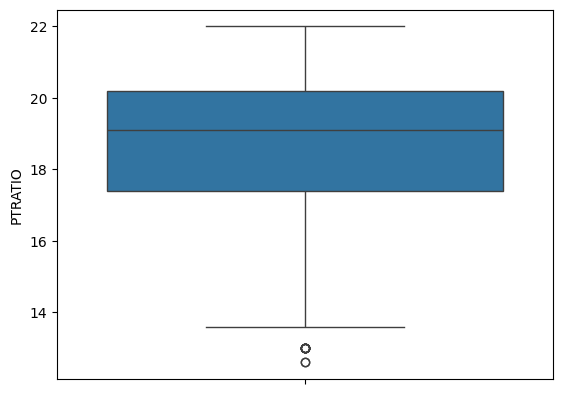

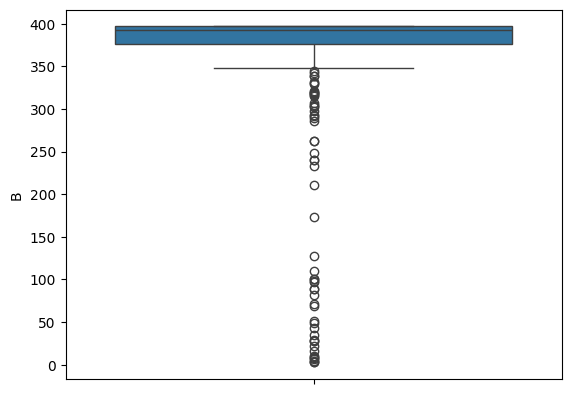

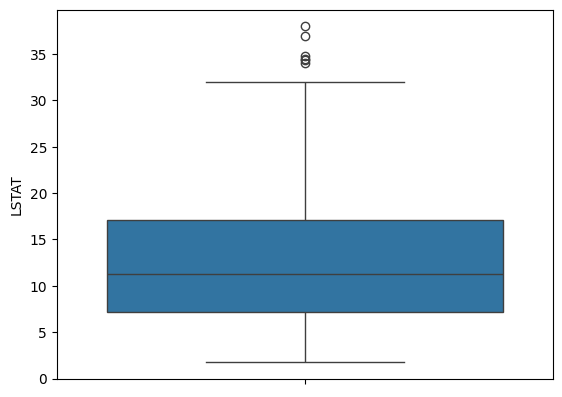

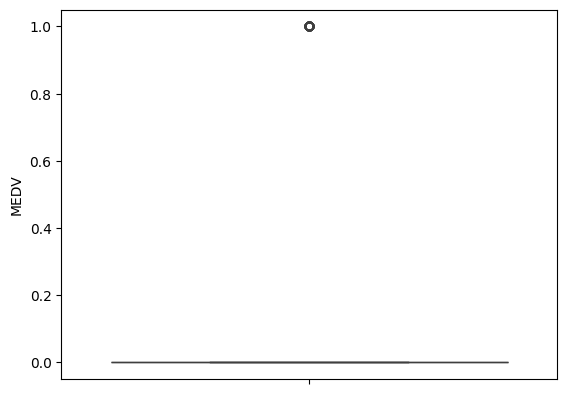

In [93]:
for col in df.columns:
    sns.boxplot(df[col])
    plt.show()

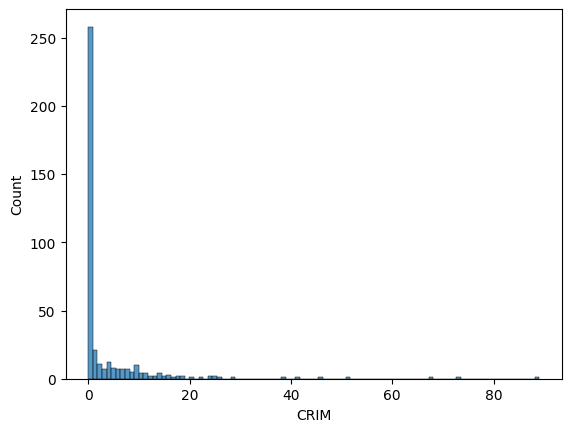

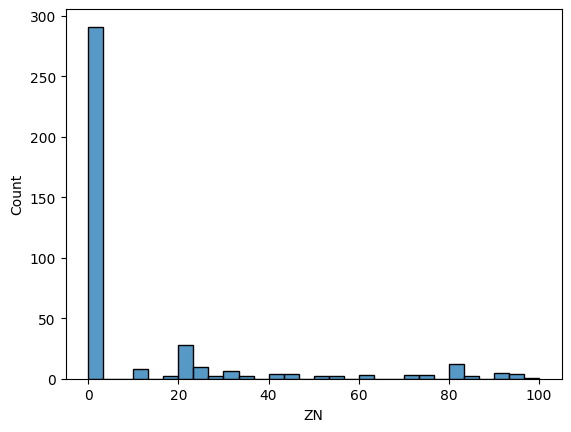

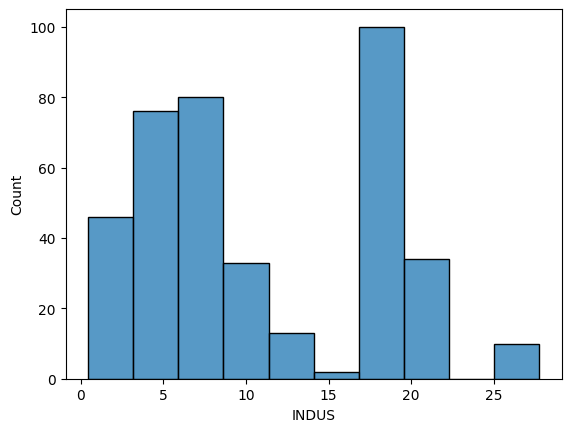

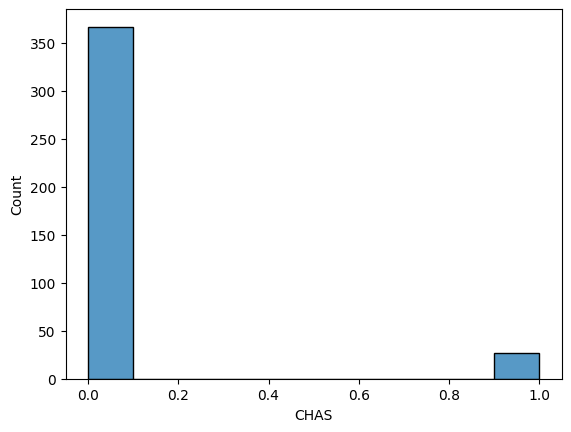

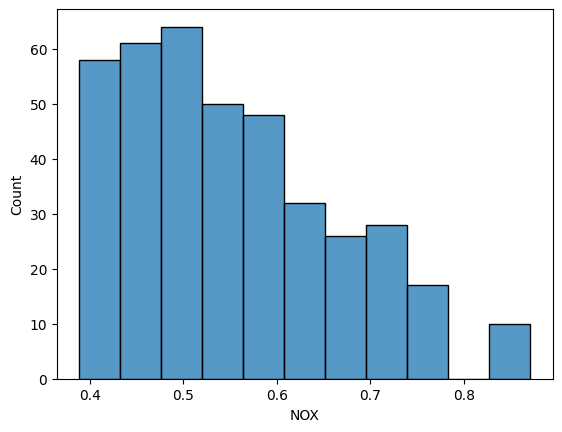

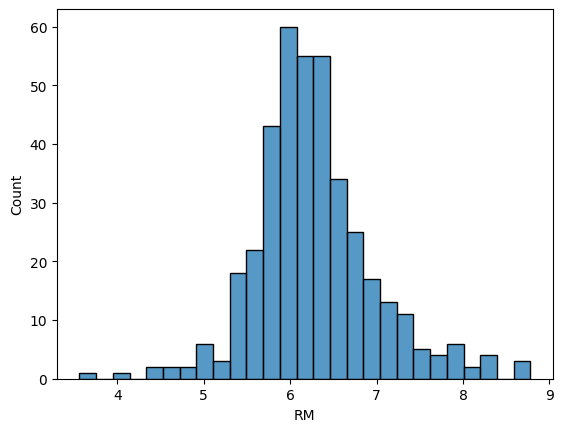

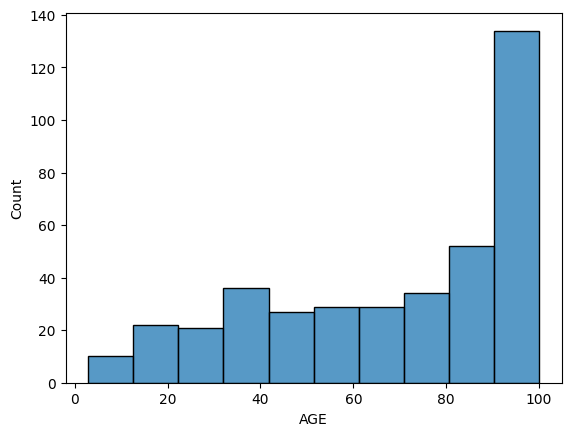

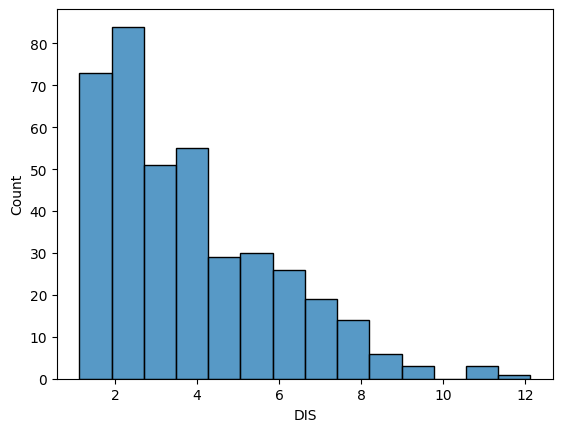

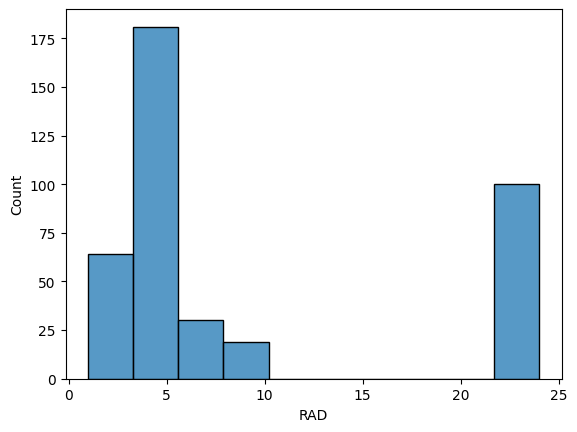

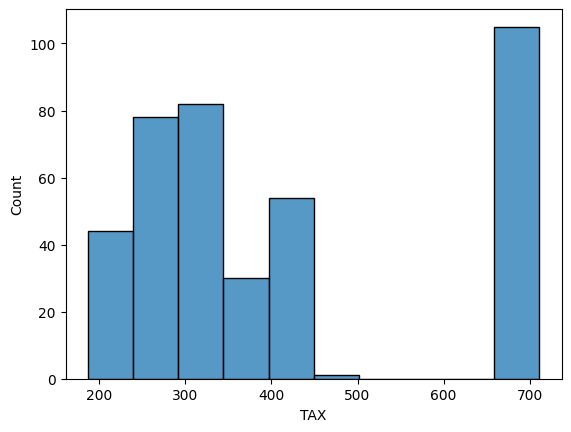

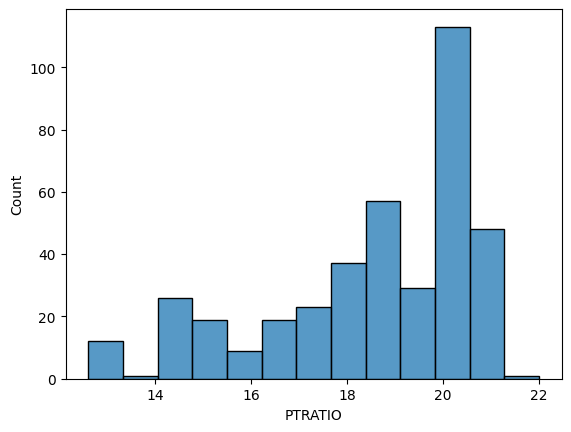

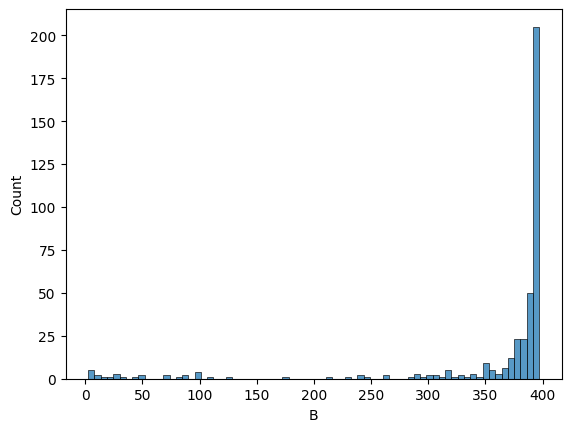

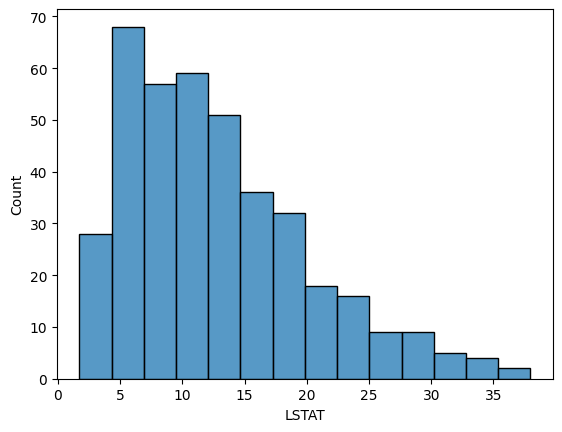

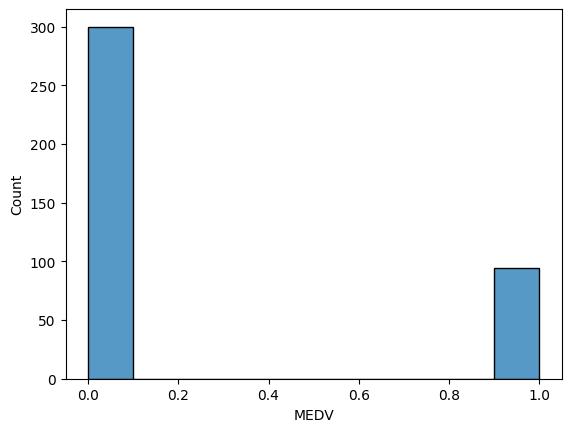

In [94]:
for col in df.columns:
    sns.histplot(df[col])
    plt.show()

In [95]:
dummy_subject = df[['LSTAT','B','CRIM','PTRATIO','RAD','TAX','RM','INDUS']]
dummy2_subject = df[['ZN']]

for col in dummy_subject:
    df[f'{col}_dummy'] = df[col].apply(lambda x: 1 if x > df[col].mean() else 0)
    
for col in dummy2_subject:
    df[f'{col}_dummy'] = df[col].apply(lambda x: 0 if x < 1 else 1)
    
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,...,MEDV,LSTAT_dummy,B_dummy,CRIM_dummy,PTRATIO_dummy,RAD_dummy,TAX_dummy,RM_dummy,INDUS_dummy,ZN_dummy
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,...,0,0,1,0,0,0,0,1,0,1
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,...,0,0,1,0,0,0,0,1,0,0
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,...,1,0,1,0,0,0,0,1,0,0
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,...,1,0,1,0,1,0,0,1,0,0
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,...,1,0,1,0,1,0,0,1,0,0


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 394 entries, 0 to 504
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CRIM           394 non-null    float64
 1   ZN             394 non-null    float64
 2   INDUS          394 non-null    float64
 3   CHAS           394 non-null    float64
 4   NOX            394 non-null    float64
 5   RM             394 non-null    float64
 6   AGE            394 non-null    float64
 7   DIS            394 non-null    float64
 8   RAD            394 non-null    int64  
 9   TAX            394 non-null    int64  
 10  PTRATIO        394 non-null    float64
 11  B              394 non-null    float64
 12  LSTAT          394 non-null    float64
 13  MEDV           394 non-null    int64  
 14  LSTAT_dummy    394 non-null    int64  
 15  B_dummy        394 non-null    int64  
 16  CRIM_dummy     394 non-null    int64  
 17  PTRATIO_dummy  394 non-null    int64  
 18  RAD_dummy      

In [97]:
x_cat = df[['LSTAT_dummy', 'B_dummy','CRIM_dummy','PTRATIO_dummy','RAD_dummy','TAX_dummy','RM_dummy','ZN_dummy','INDUS_dummy', 'MEDV']]
x_num = df.drop(columns=['LSTAT_dummy', 'B_dummy','CRIM_dummy','PTRATIO_dummy','RAD_dummy','TAX_dummy','RM_dummy','ZN_dummy','INDUS_dummy'])

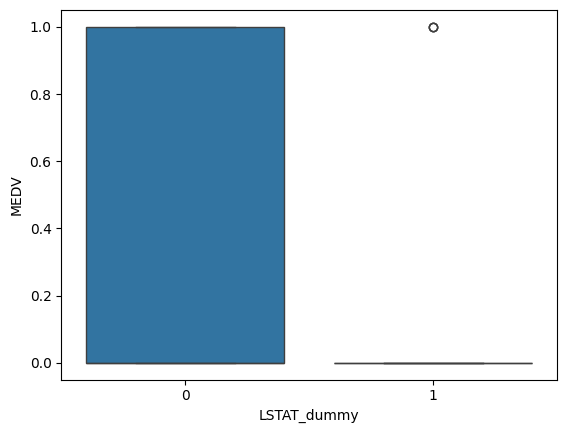

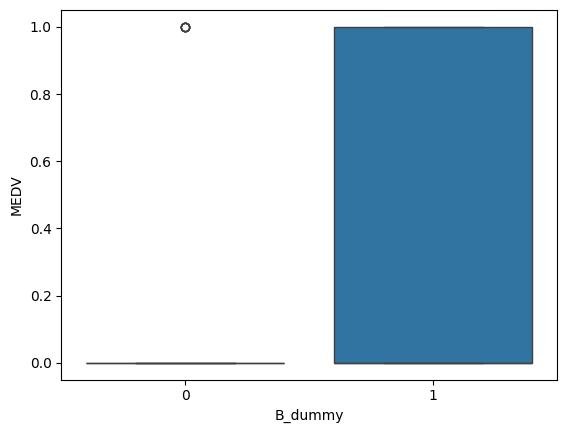

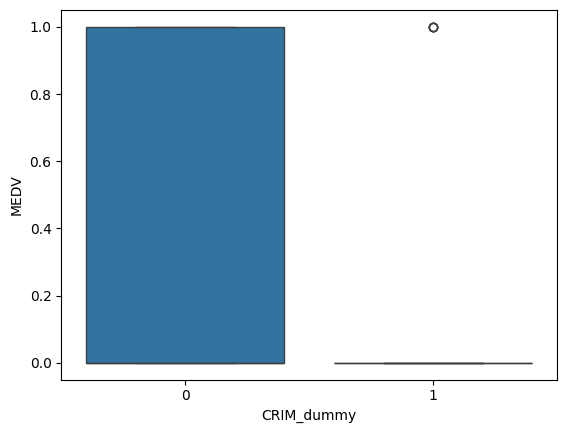

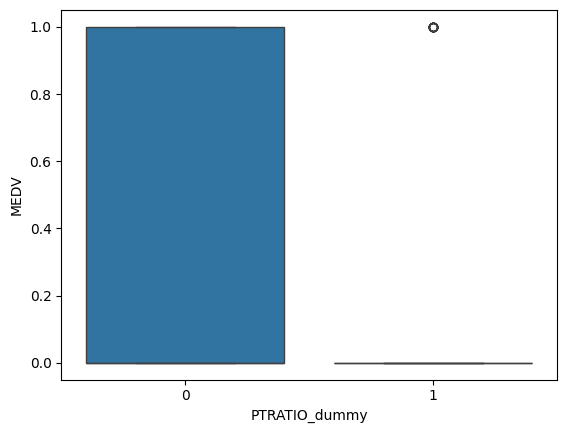

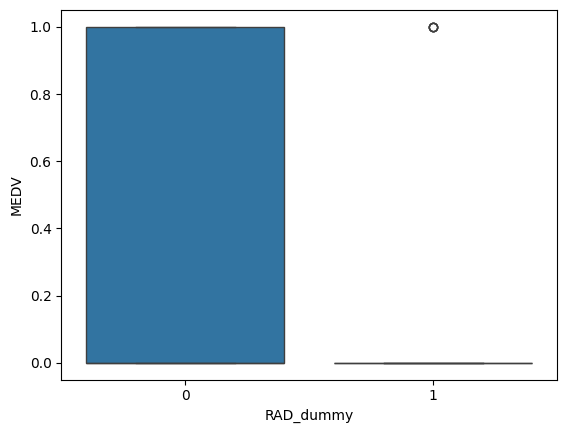

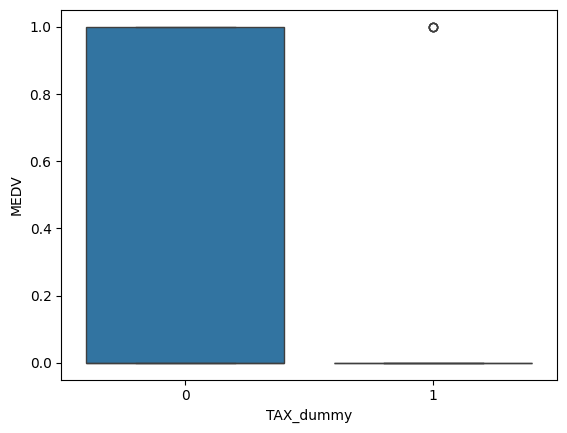

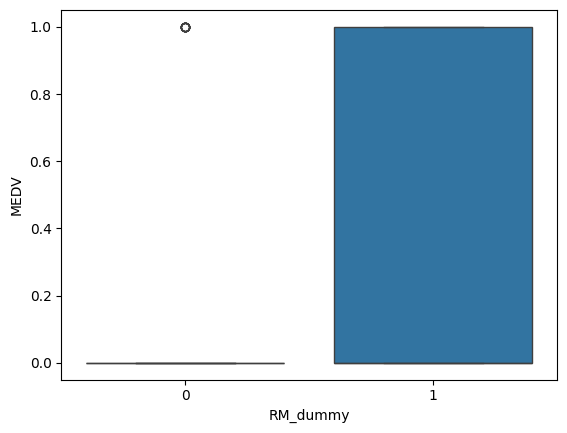

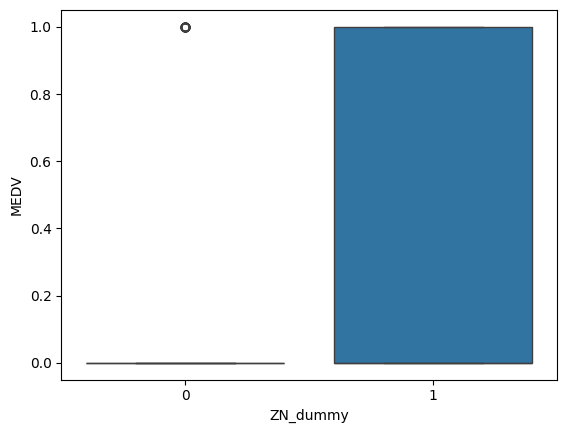

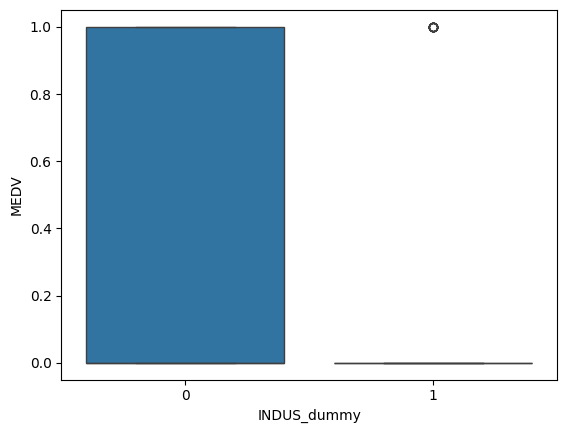

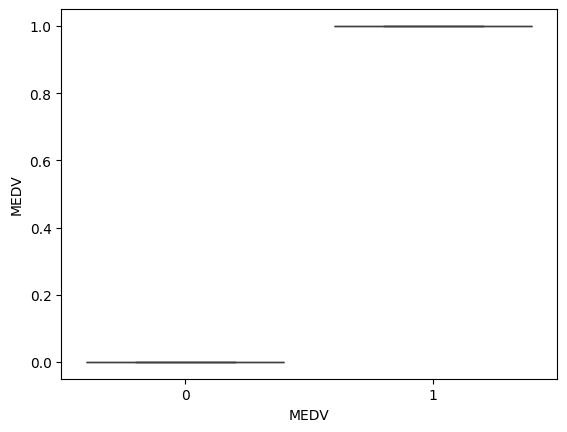

In [98]:
for col in x_cat.columns:
    sns.boxplot(x=x_cat[col], y=df['MEDV'])
    plt.show()

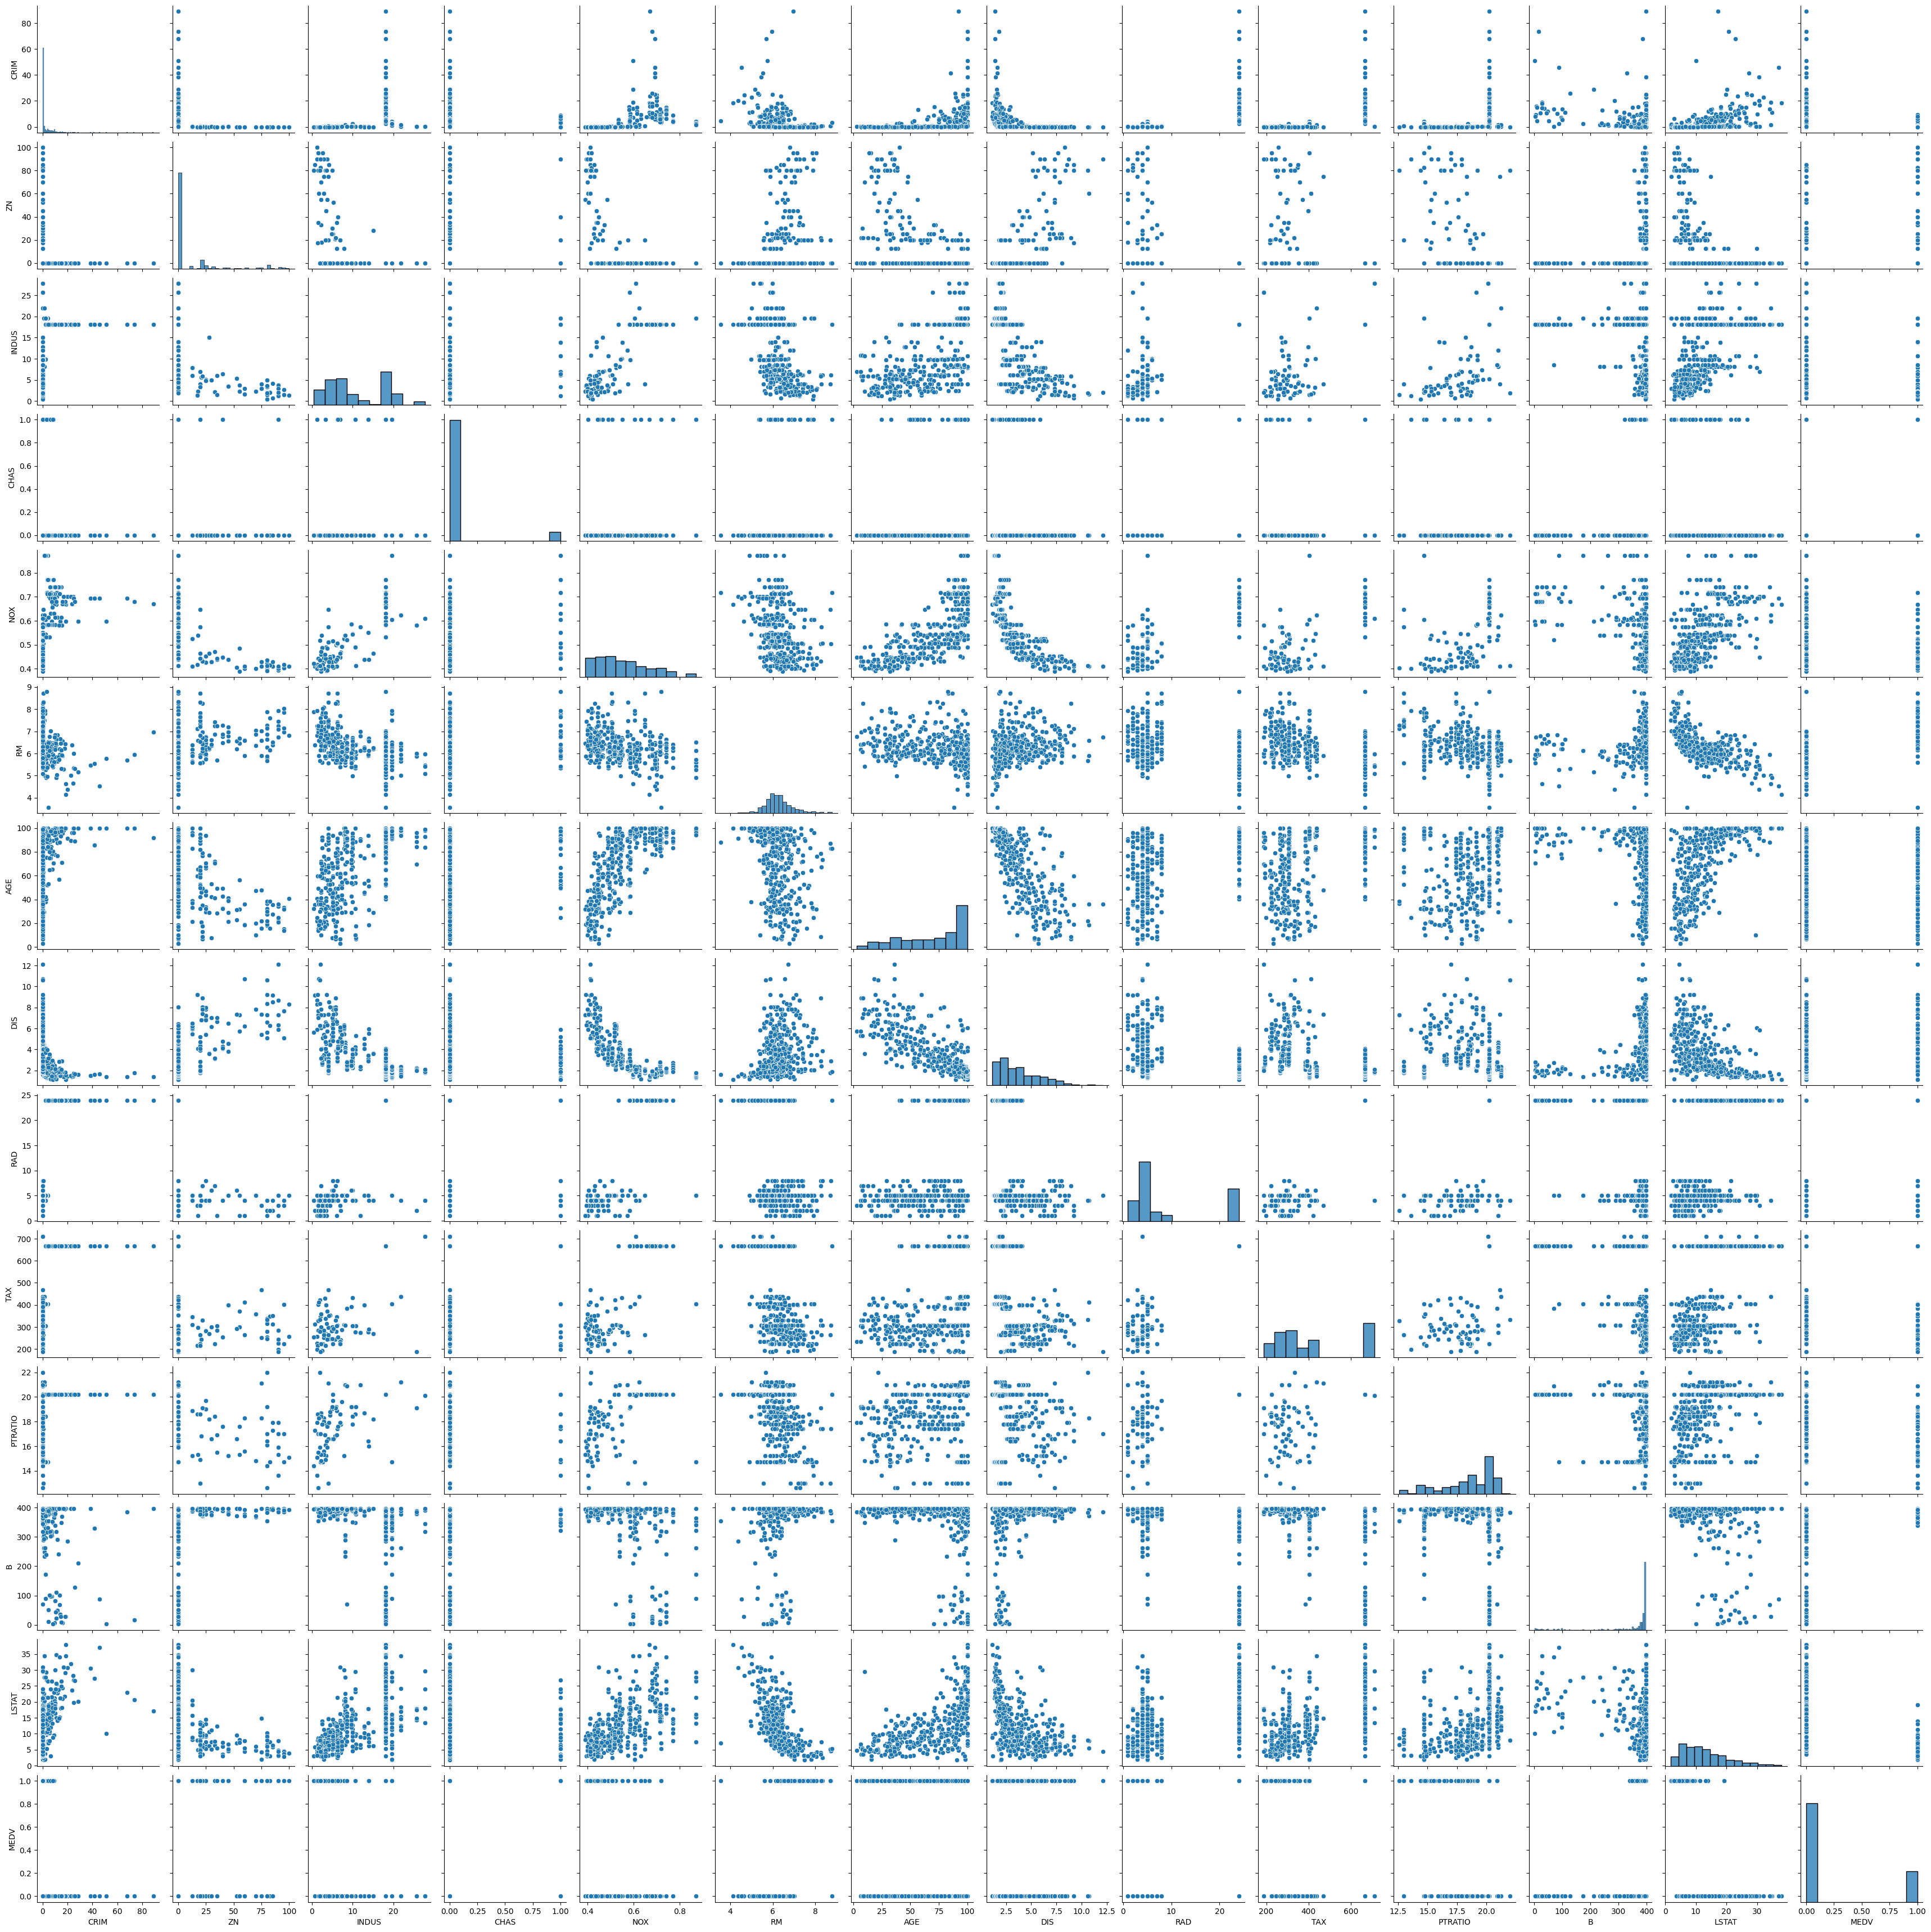

In [99]:
sns.pairplot(x_num)
plt.show()

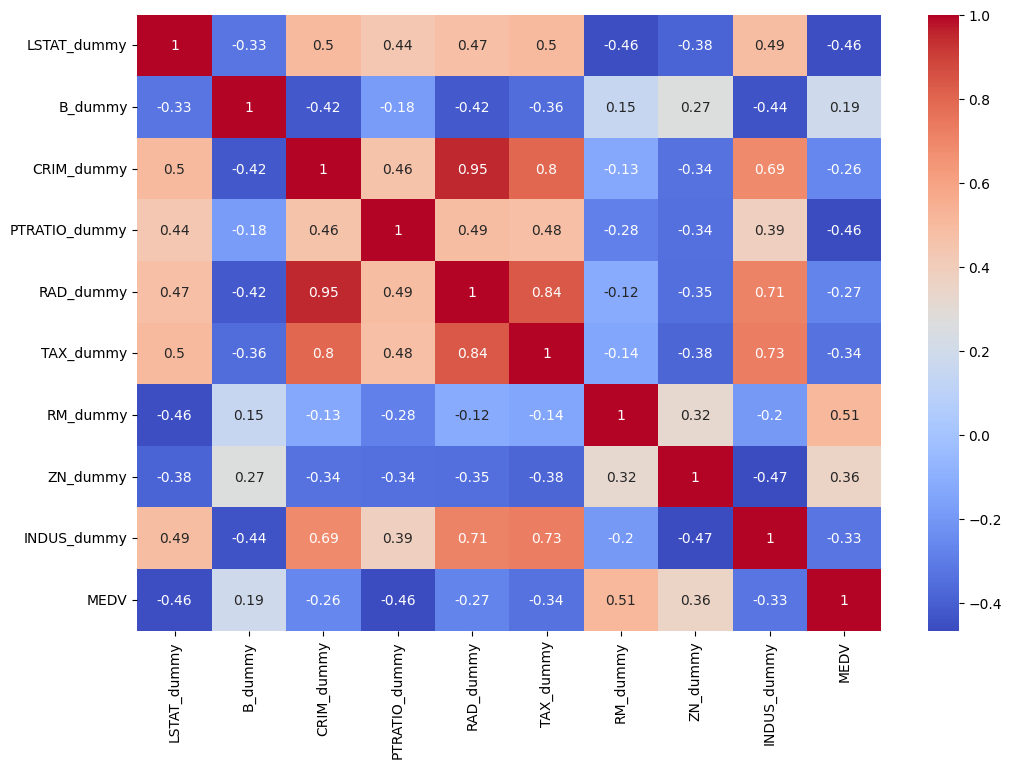

In [100]:
plt.figure(figsize=(12,8))
sns.heatmap(x_cat.corr(),annot=True,cmap='coolwarm')
plt.show()

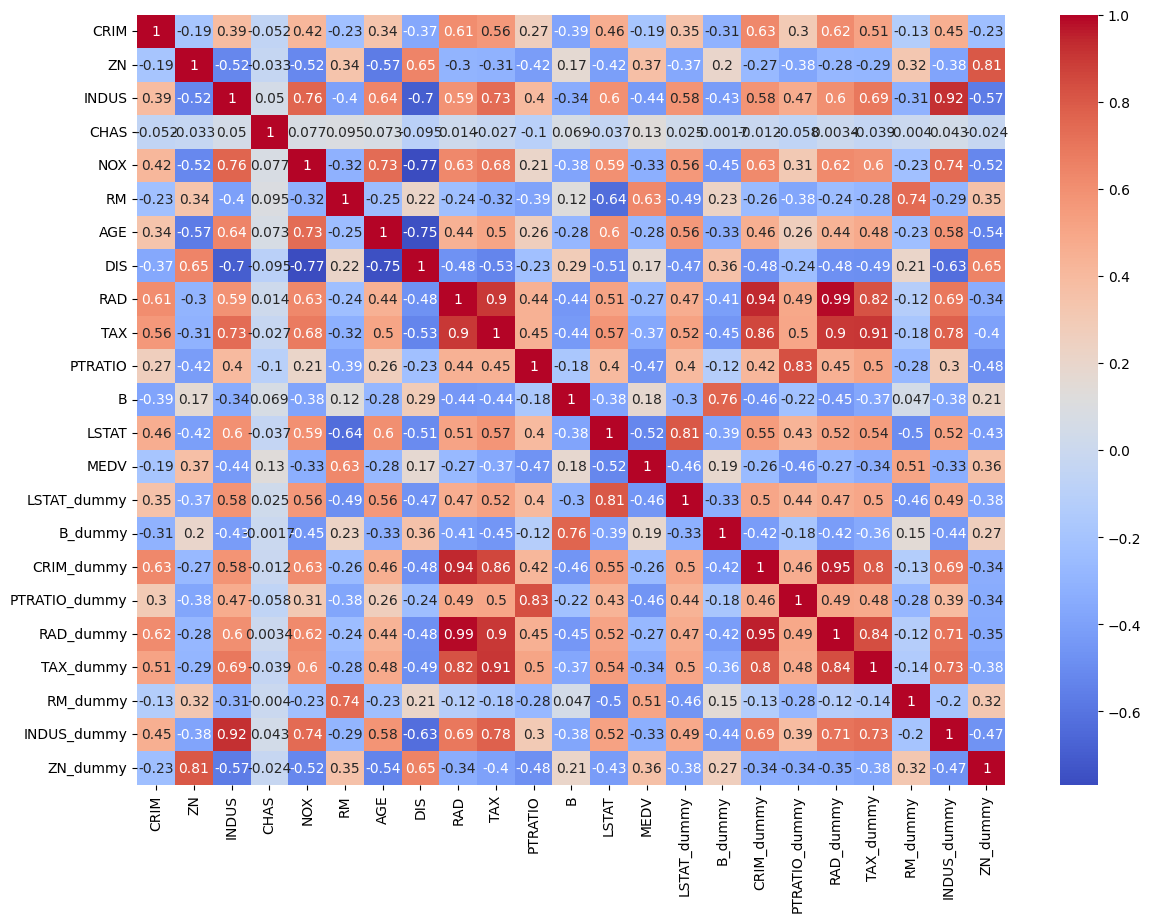

In [101]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(),annot=True, cmap='coolwarm')
plt.show()

In [102]:
df.drop(columns=['CHAS','RAD','RAD_dummy','TAX_dummy'],inplace=True)

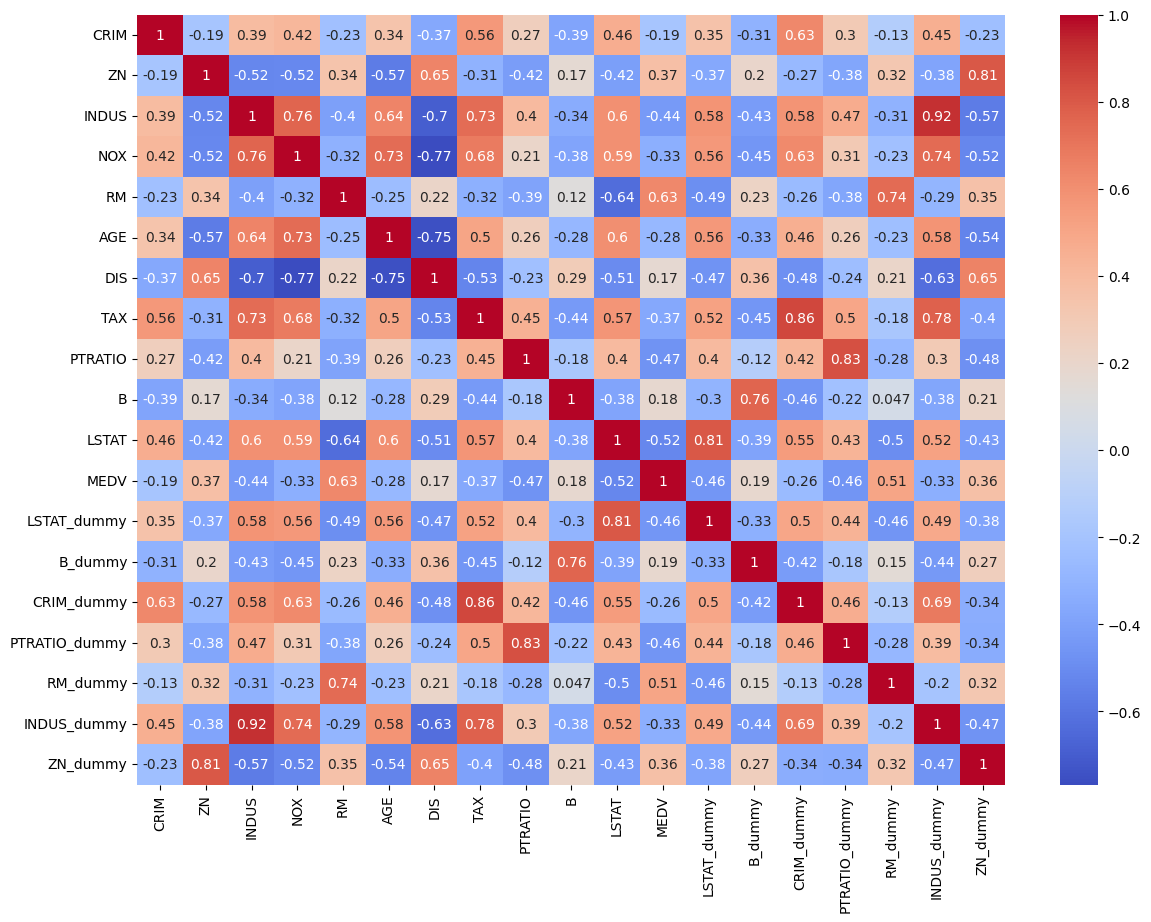

In [103]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()

In [104]:
x = df.drop(columns='MEDV')
y = df['MEDV']

In [105]:
def strat(x,y,train_size=0.8):
    np.random.seed(42)
    yidx = {}
    for i,label in enumerate(y):
        if label not in yidx:
            yidx[label] = [i]
        else:
            yidx[label].append(i)
            
    trbox = []
    tebox = []
    
    for i,label in yidx.items():
        shuffle = np.random.permutation(label)
        train = max(1,int(len(shuffle) * train_size))
        trbox.extend(shuffle[:train])
        tebox.extend(shuffle[train:])
        
    xtr = x.iloc[trbox].reset_index(drop=True)
    xte = x.iloc[tebox].reset_index(drop=True)
    ytr = y.iloc[trbox].reset_index(drop=True)
    yte = y.iloc[tebox].reset_index(drop=True)
    
    return xtr,xte,ytr,yte

In [106]:
xtr,xte,ytr,yte = strat(x,y)

In [110]:
y.value_counts()

MEDV
0    300
1     94
Name: count, dtype: int64

In [107]:
print(ytr.value_counts())
print(yte.value_counts())

MEDV
0    240
1     75
Name: count, dtype: int64
MEDV
0    60
1    19
Name: count, dtype: int64


In [117]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

xtr_bal,ytr_bal = smote.fit_resample(xtr,ytr)

In [119]:
print(ytr_bal.value_counts())
print(ytr.value_counts())

MEDV
0    240
1    240
Name: count, dtype: int64
MEDV
0    240
1     75
Name: count, dtype: int64


In [120]:
minim = xtr_bal.min()
maxim = xtr_bal.max()
ranger = (maxim - minim)
xtrs = (xtr_bal - minim) / ranger
xtes = (xte - minim) / ranger

In [124]:
from sklearn.metrics import classification_report

In [121]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(xtrs, ytr_bal)
ypred = knn.predict(xtes)

In [128]:
acc = (np.mean(ypred == yte) * 100)
print(acc)
knn_rep = classification_report(ypred, yte)
print(knn_rep)

87.34177215189874
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        60
           1       0.74      0.74      0.74        19

    accuracy                           0.87        79
   macro avg       0.83      0.83      0.83        79
weighted avg       0.87      0.87      0.87        79



In [129]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42,max_depth=100,n_estimators=100)
rf.fit(xtrs,ytr_bal)
ypred_rf = rf.predict(xtes)
accrf = np.mean(ypred_rf == yte)
print(accrf)
rf_rep = classification_report(ypred_rf,yte)
print(rf_rep)

0.8734177215189873
              precision    recall  f1-score   support

           0       0.93      0.90      0.92        62
           1       0.68      0.76      0.72        17

    accuracy                           0.87        79
   macro avg       0.81      0.83      0.82        79
weighted avg       0.88      0.87      0.88        79

